<a href="https://colab.research.google.com/github/JMML2021/Sprint-8.-Algoritmes-d-aprenentatge-NO-supervisat-Agrupaci-/blob/main/Sprint_8_Algoritmes_d%E2%80%99aprenentatge_NO_supervisat_Agrupaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
 

In [2]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [206]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/Publicacions Facebook Thailandia.csv')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  7050 filas con 16 columnas

Imprimo el primer registro, solo para ver como es:



ï»¿status_id        246675545449582_1649696485147474
status_type                                    video
status_published                      4/22/2018 6:00
num_reactions                                    529
num_comments                                     512
num_shares                                       262
num_likes                                        432
num_loves                                         92
num_wows                                           3
num_hahas                                          1
num_sads                                           1
num_angrys                                         0
Column1                                          NaN
Column2                                          NaN
Column3                                          NaN
Column4                                          NaN
Name: 0, dtype: object

In [207]:
df1.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [208]:
#Check data with info function
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [209]:
# Search for missing, NA and null values)


(df1.isnull() | df1.empty | df1.isna()).sum()

ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [210]:
df1.columns

Index(['ï»¿status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

# Data analysis
Basic statistical analysis

In [211]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
df1.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b8c3c8310>,
      dtype=object)

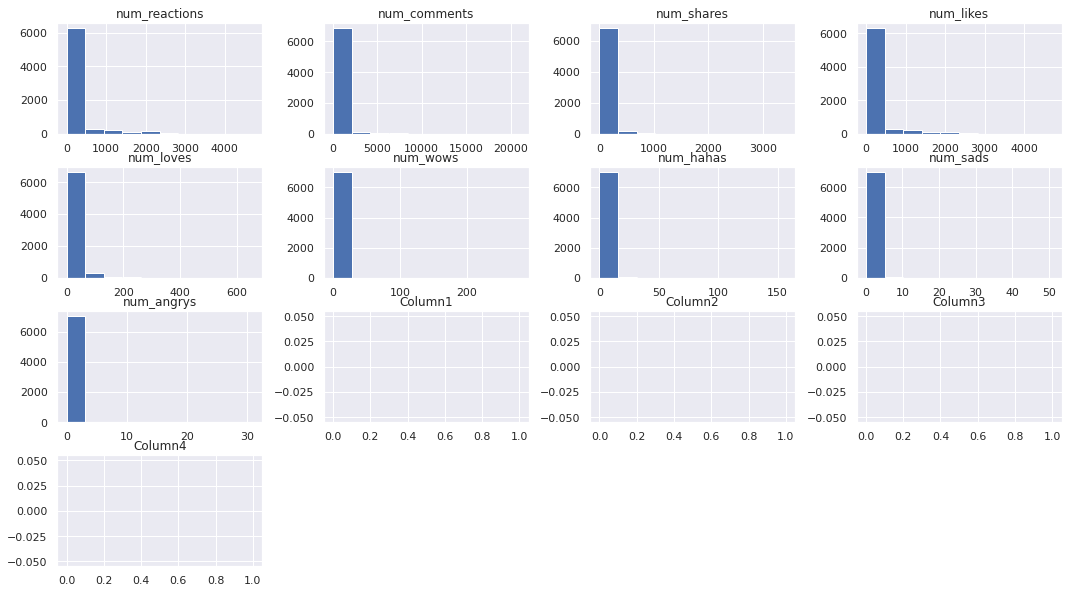

In [212]:
#Let's show the histograms of the variables alcohol, magnesium y color_intensity.
#Histogramas
 
df1[df1.columns].hist(figsize=(18,10))

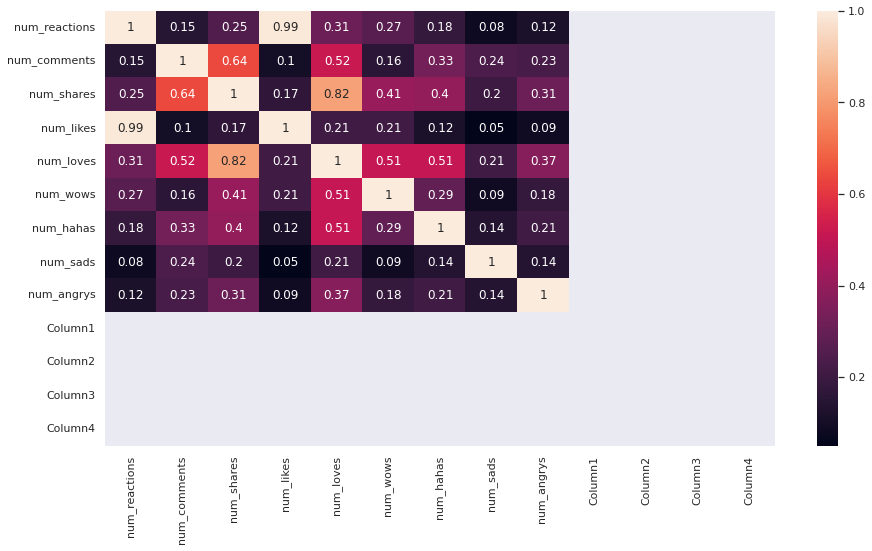

In [213]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

https://colab.research.google.com/github/JMML2021/Sprint-7.-Algoritmes-d-aprenentatge-supervisat-Classificaci-/blob/main/Sprint_7_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb#scrollTo=lzjdcUxTCQaG

Creacion de 4 nuevas  columnas:
year
month
day
hour

---



In [214]:
df1['status_published'] = pd.to_datetime(df1['status_published'])

df1['year'] = df1['status_published'].dt.year
df1['month'] = df1['status_published'].dt.month
df1['day'] = df1['status_published'].dt.day
df1['hour'] = df1['status_published'].dt.hour

#df1 = df1.drop(['status_id'], axis=1) #quito esta columna

# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

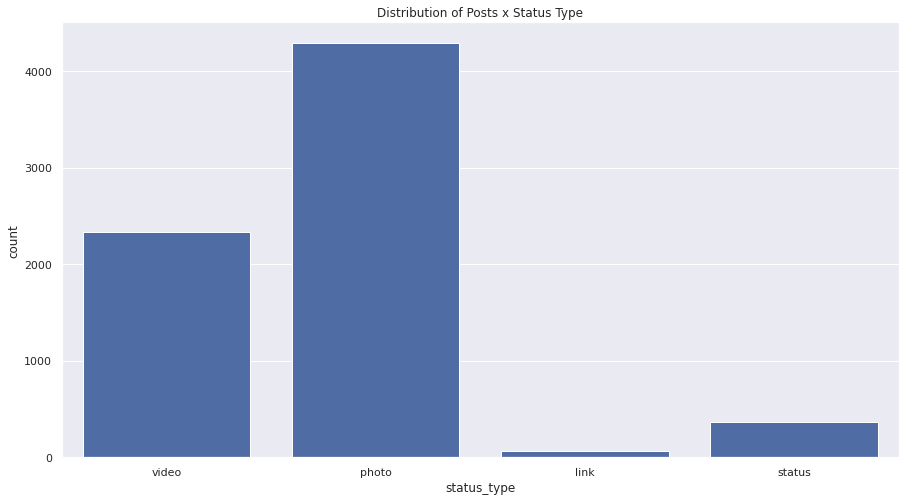

In [215]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["status_type"], palette= pal)
pl.set_title("Distribution of Posts x Status Type")
plt.show()

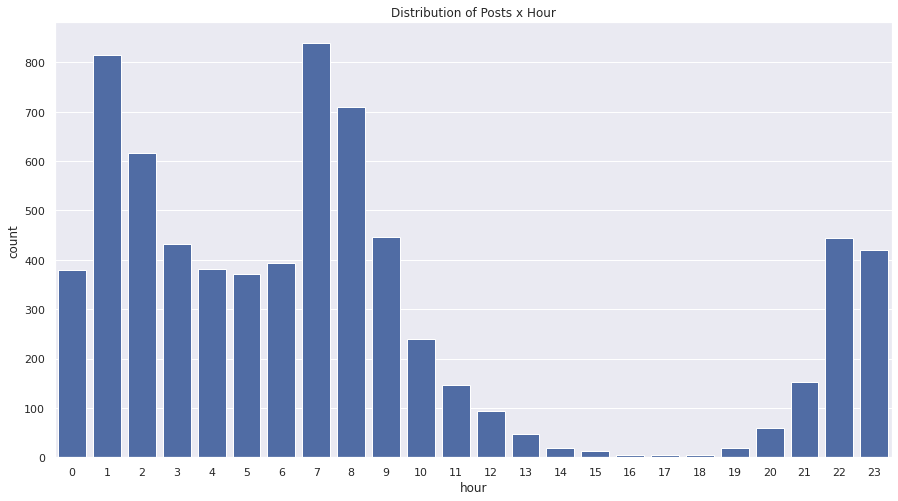

In [216]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["hour"], palette= pal)
pl.set_title("Distribution of Posts x Hour")
plt.show()

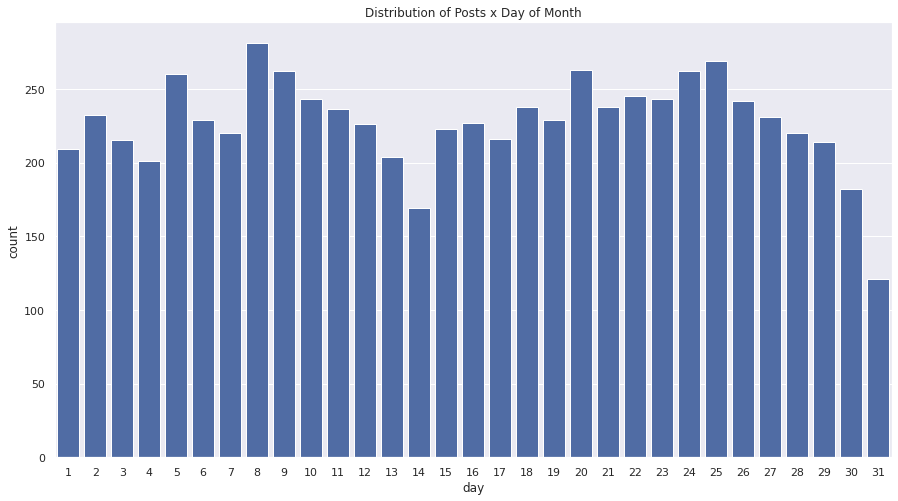

In [217]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["day"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

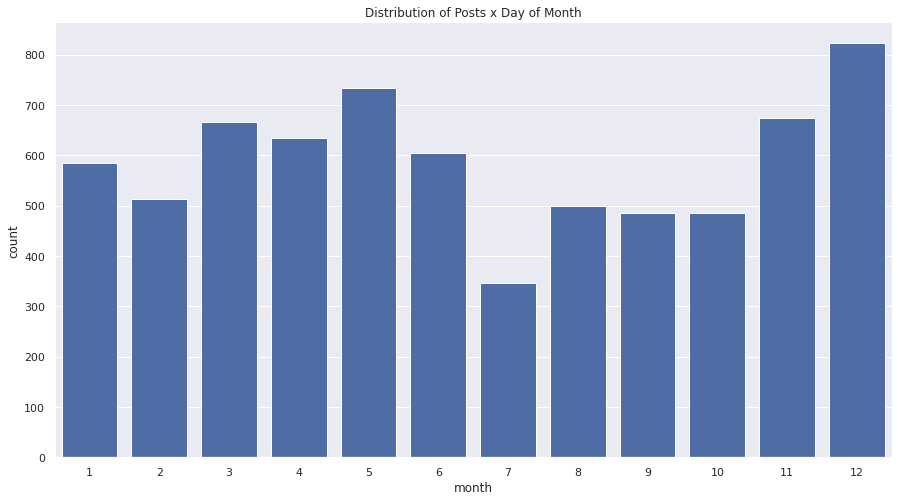

In [218]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["month"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

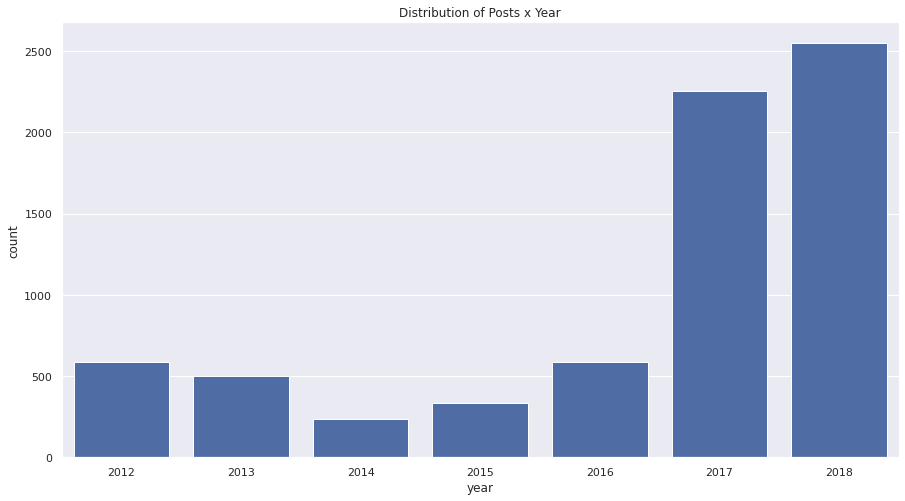

In [219]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["year"], palette= pal)
pl.set_title("Distribution of Posts x Year")
plt.show()

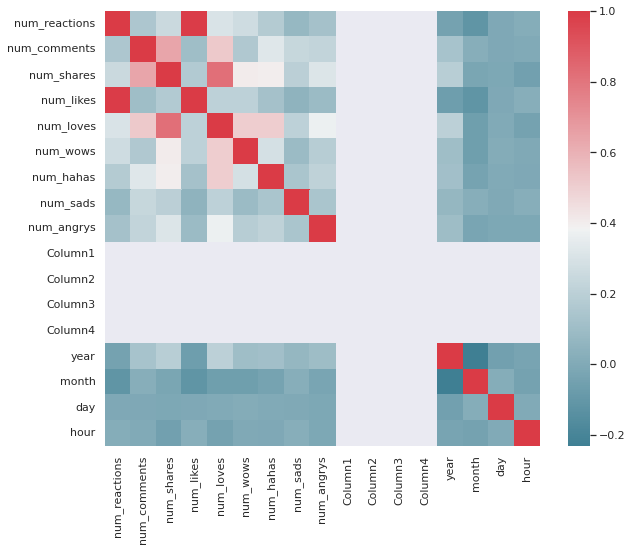

In [220]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [221]:
# Elimino las columnas vacias
df1= df1.drop(['Column1', 'Column2','Column3','Column4'], axis=1)

La correlacion esta en:
num_reactions
num_loves
year
num_comments

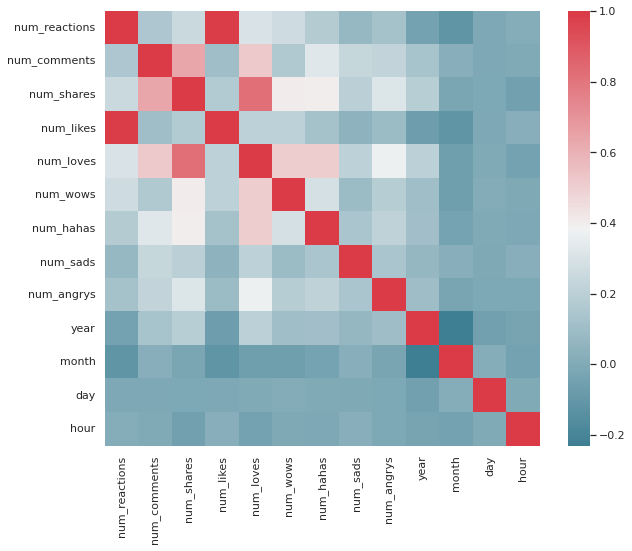

In [222]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [223]:
#df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments', 'hour', 'day', 'month', 'ï»¿status_id'], axis=1)
df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments',  'day',  'ï»¿status_id'], axis=1)

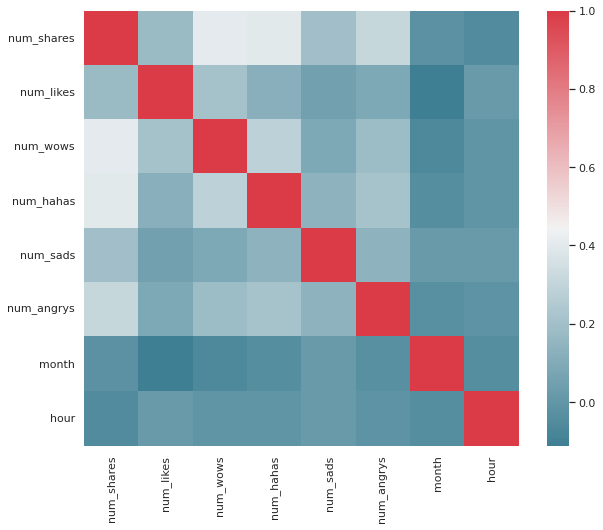

In [224]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [225]:
s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4}

In [226]:
df1.status_type = [s_type[item] for item in df1.status_type]

In [227]:
df1 = df1.drop('status_published', axis=1)

In [228]:
df1.iloc[10:15]

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour
10,2,3,202,1,0,0,0,4,1
11,2,0,213,4,0,0,0,4,2
12,2,2,305,2,0,0,0,4,5
13,2,0,200,1,0,0,0,4,2
14,2,0,335,1,0,0,0,4,9


In [229]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status_type  7050 non-null   int64
 1   num_shares   7050 non-null   int64
 2   num_likes    7050 non-null   int64
 3   num_wows     7050 non-null   int64
 4   num_hahas    7050 non-null   int64
 5   num_sads     7050 non-null   int64
 6   num_angrys   7050 non-null   int64
 7   month        7050 non-null   int64
 8   hour         7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


## Elegir el mejor numero de cluster para el K-means

In [243]:
# choosing the best number of clusters using the silhouette score
from sklearn import metrics
Knumber=[]
CHnumber=[]

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8543433493722996)
For n_clusters = 3, silhouette score is 0.8070206453146859)
For n_clusters = 4, silhouette score is 0.6337773970770166)
For n_clusters = 5, silhouette score is 0.6358286979071406)
For n_clusters = 6, silhouette score is 0.6367721425113296)
For n_clusters = 7, silhouette score is 0.6834367489330394)
For n_clusters = 8, silhouette score is 0.6534862053568059)
For n_clusters = 9, silhouette score is 0.6472661054053989)


Text(0, 0.5, 'Calinski-Harabasz Indice')

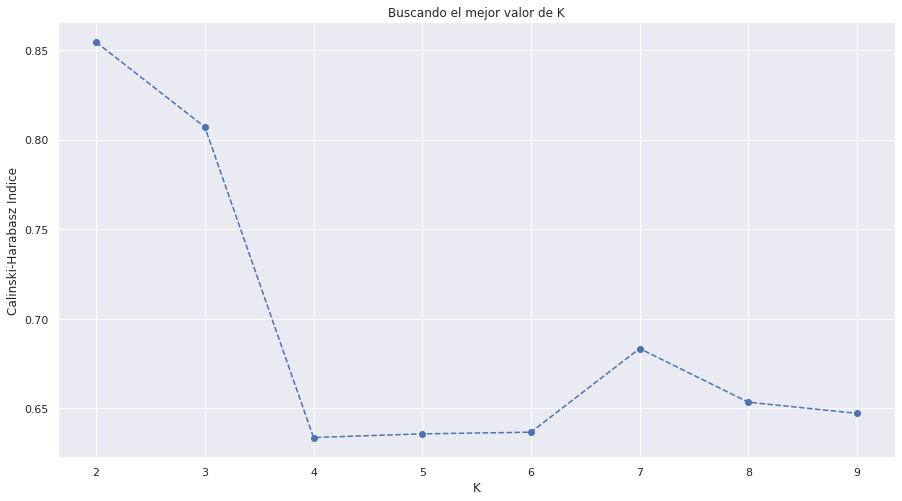

In [246]:
plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')

In [231]:
# k-means clustering
from sklearn.cluster import KMeans

clustering_kmeans = KMeans(n_clusters=2)
df1['Clusters'] = clustering_kmeans.fit_predict(df1)

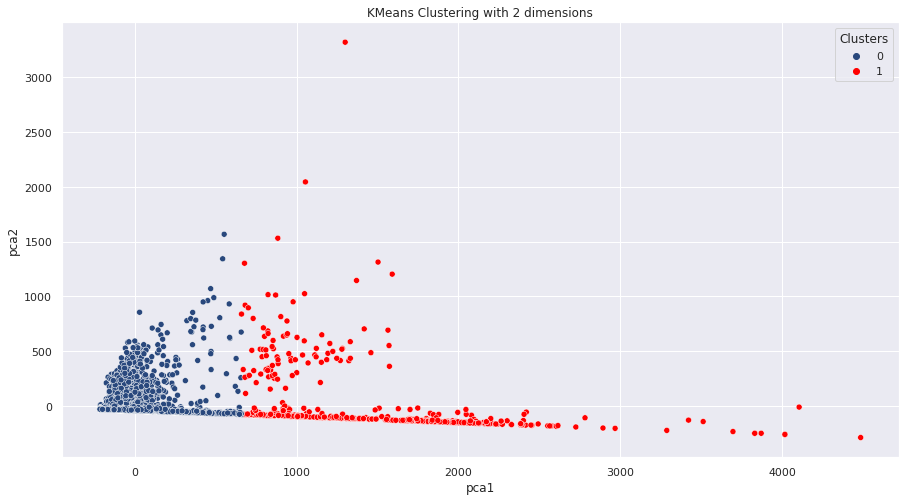

In [232]:
reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "red"]

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()


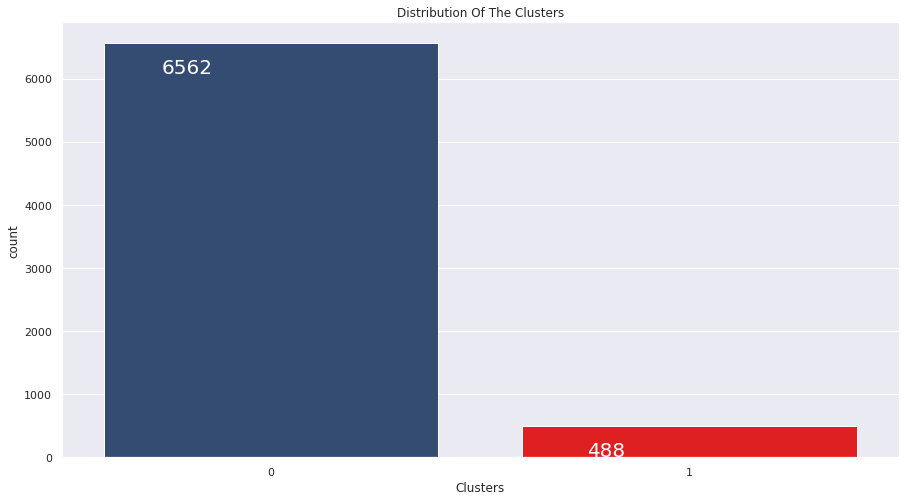

In [255]:
#Plotting countplot of clusters
pl = sns.countplot(x=df1["Clusters"], palette= pal, data=df1)
pl.set_title("Distribution Of The Clusters")


for p in pl.patches:
    pl.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+112), ha='center', va='top', color='white', size=20)

plt.show()

In [234]:
df1['Clusters'].value_counts()

0    6562
1     488
Name: Clusters, dtype: int64

## Function for undersampling

In [235]:
def downsample(df1, label_col_name):
    # find the number of observations in the smallest group
    nmin = df1[label_col_name].value_counts().min()
    return (df1
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [236]:
df_us = downsample(df1, 'Clusters')

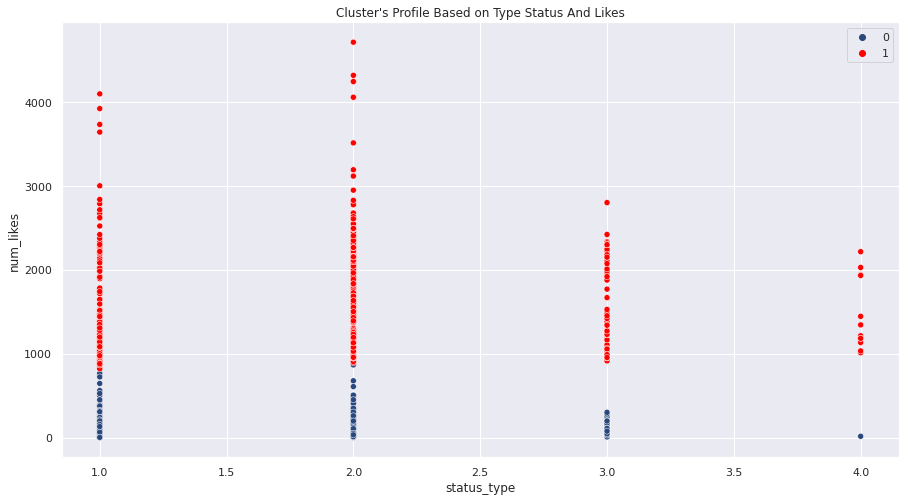

In [237]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["status_type"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Type Status And Likes")
plt.legend()
plt.show()

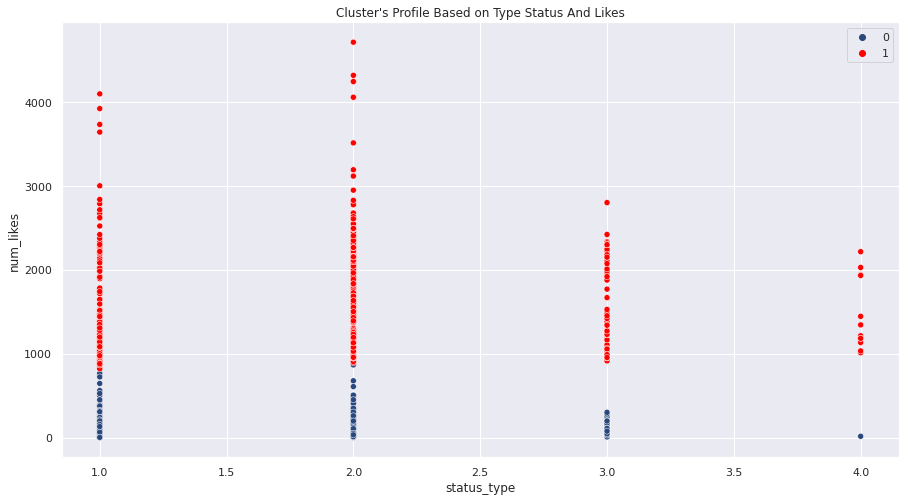

In [238]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["status_type"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Type Status And Likes")
plt.legend()
plt.show()

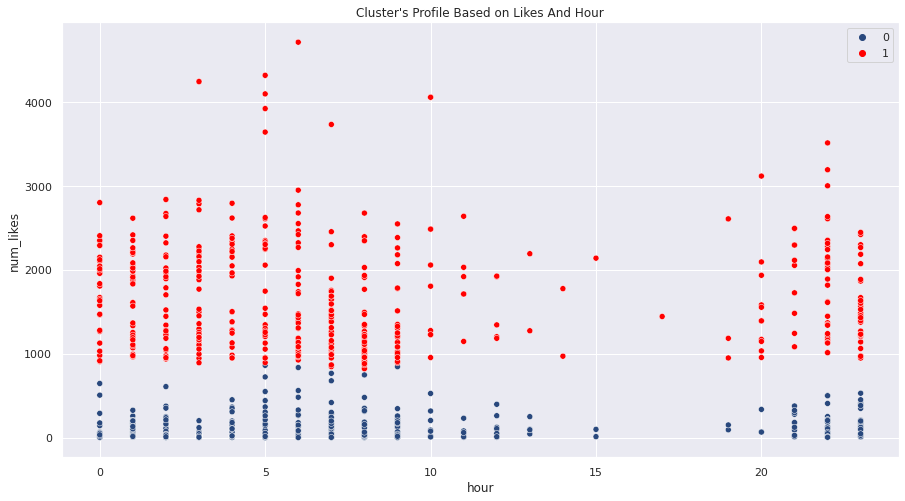

In [239]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Likes And Hour")
plt.legend()
plt.show()

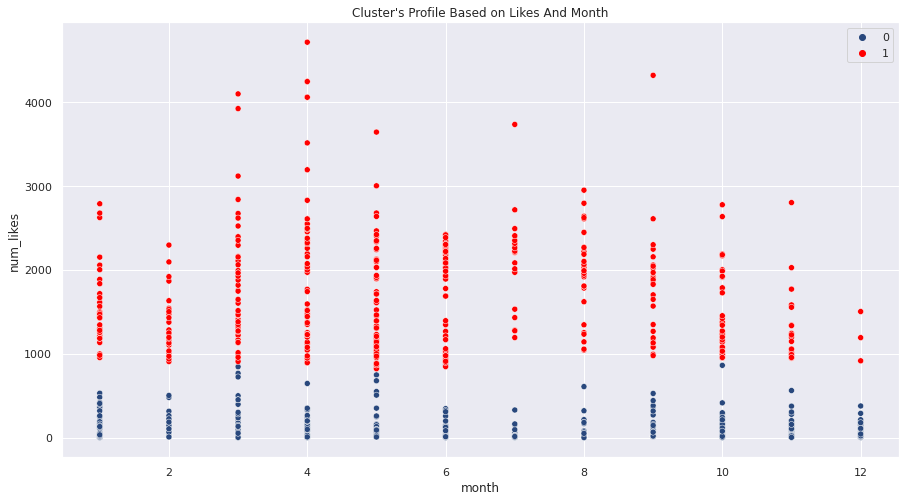

In [240]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["month"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Likes And Month")
plt.legend()
plt.show()

Perfil del clúster basado en interacciones y gustos
Podemos ver que, independientemente de la cantidad de likes, cuando tenemos alrededor de 1000 likes es cuando tenemos la mayor cantidad de wows.

No hay mucha diferencia entre los dos grupos en este análisis, el número de hahas por lo general nunca pasa de los 30

De nuevo, no hay mucha diferencia, el número de sads suele estar entre 0 y 5.

El número de angrys nunca fluctúa tanto, por lo general está alrededor de 0 - 5

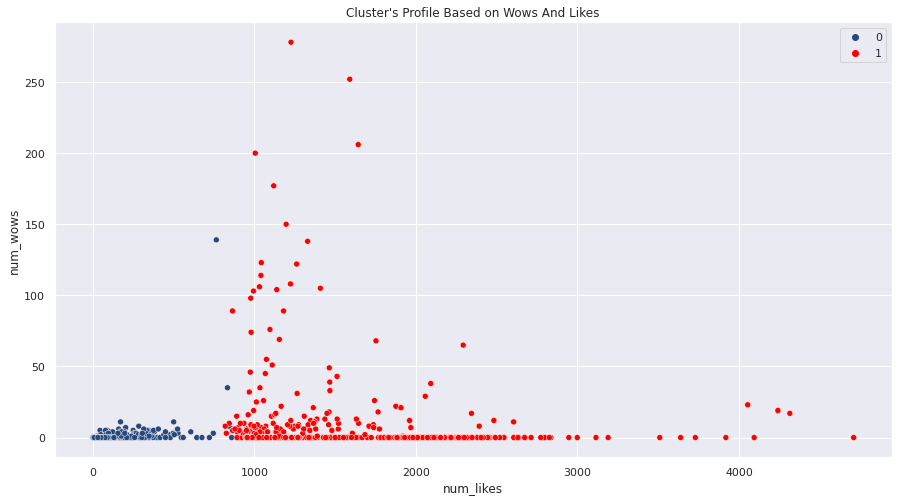

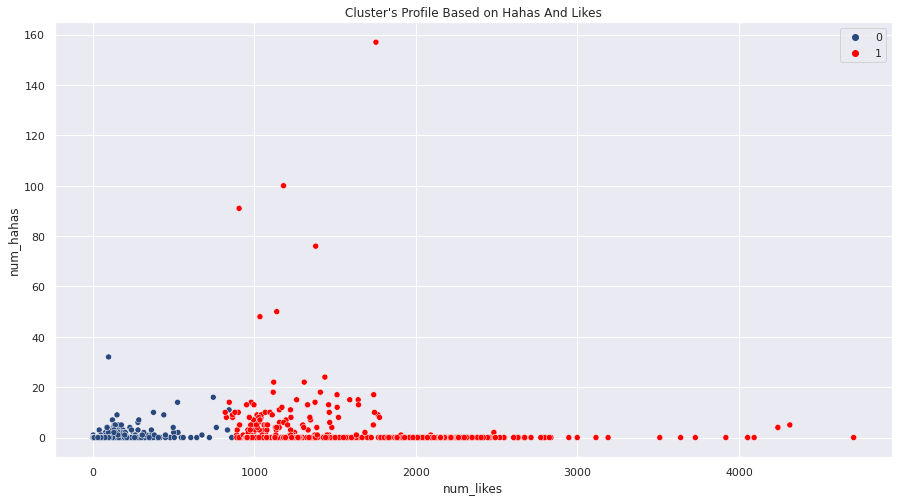

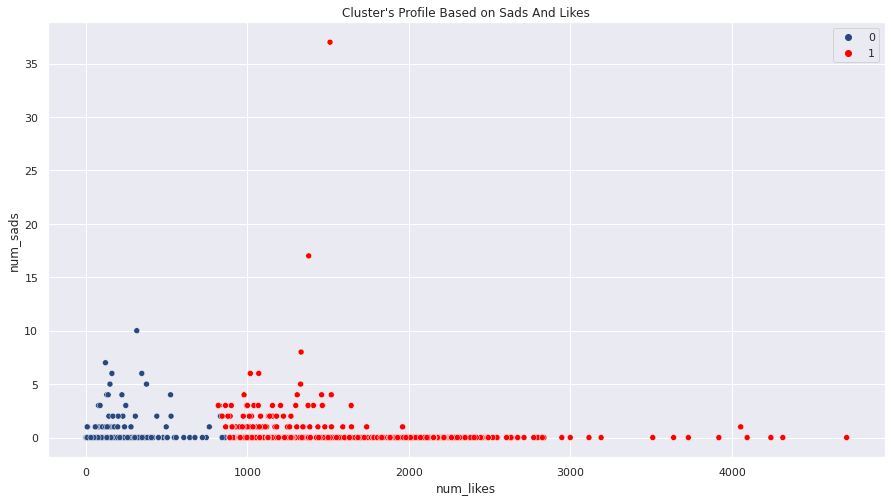

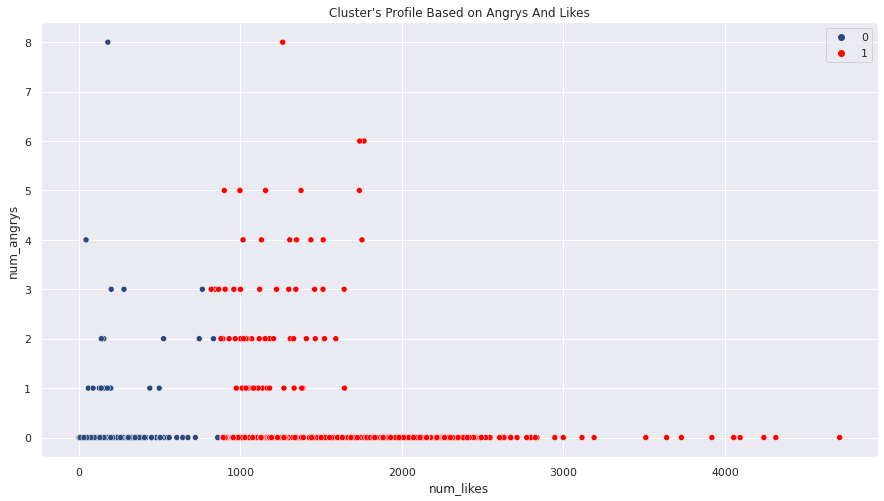

In [241]:
pl = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Wows And Likes")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hahas And Likes")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Sads And Likes")
plt.legend()
plt.show()

pl4 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl4.set_title("Cluster's Profile Based on Angrys And Likes")
plt.legend()
plt.show()

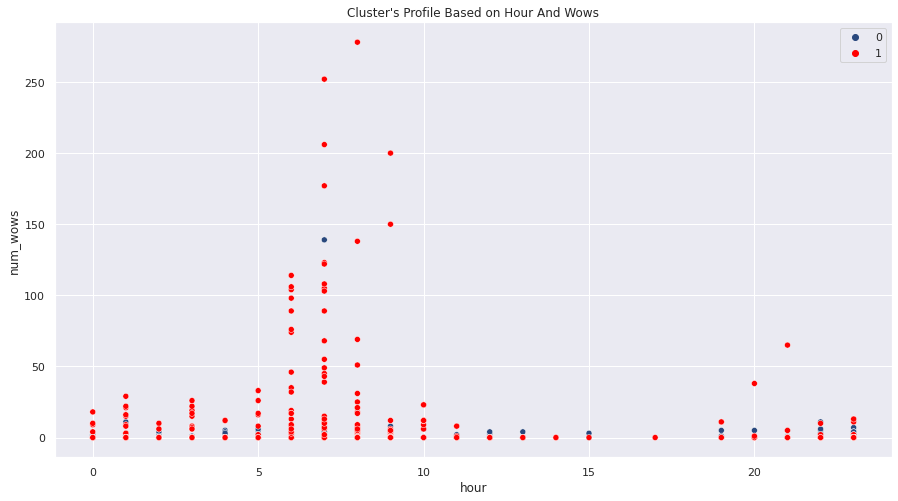

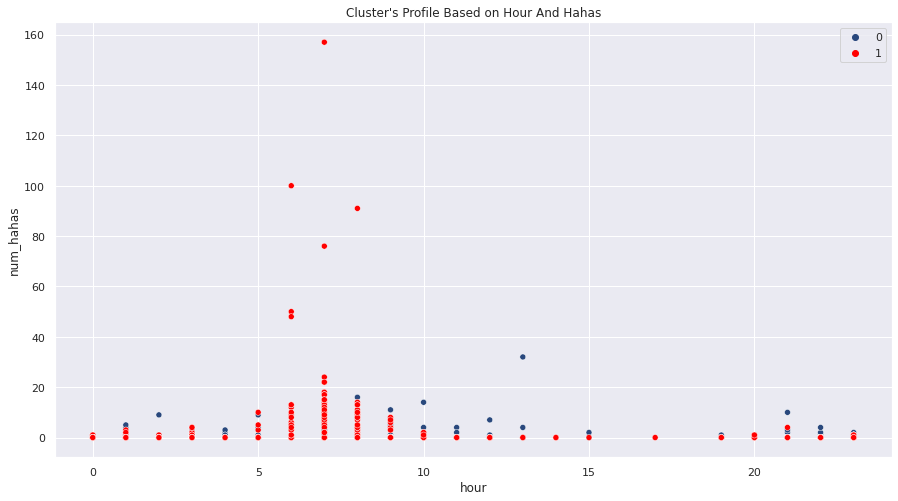

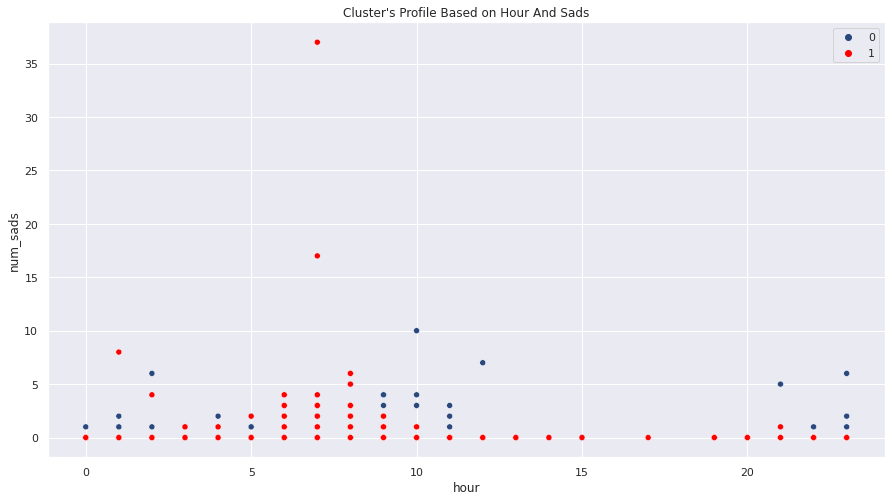

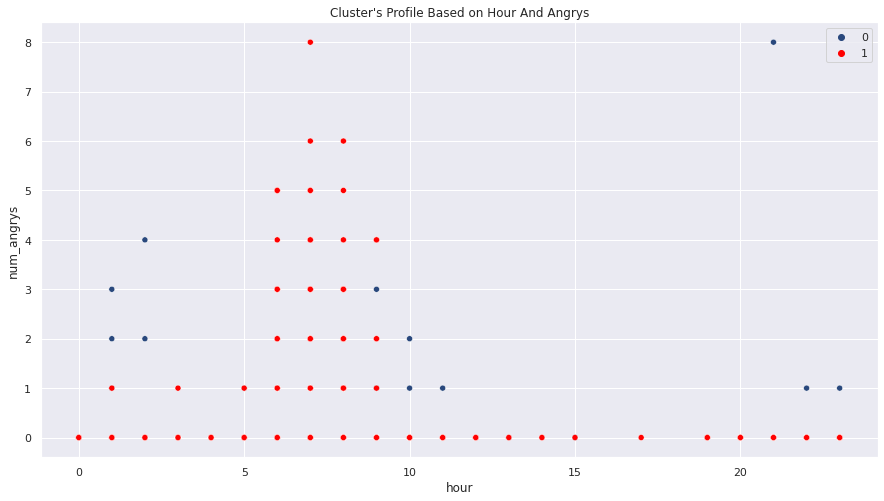

In [242]:
# hour x num_x
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Hour And Wows")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hour And Hahas")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Sads")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Angrys")
plt.legend()
plt.show()

** Conclusión**

Se puede concluir que el clúster 0 tiene vendedores que en general son menos populares. Por otro lado, los vendedores del clúster 1 tienen vendedores que son súper populares.

Como vimos en el gráfico "Perfil del clúster basado en acciones y me gusta", los vendedores del clúster 0 tienen menos acciones y menos me gusta que los vendedores del clúster 1.

En el siguiente gráfico "Perfil del clúster basado en tipo de estado y me gusta", los vendedores del clúster 0, independientemente del tipo de estado, siempre tienen menos me gusta que los vendedores del clúster 1.

En el gráfico "Perfil del clúster basado en Me gusta y hora" pudimos concluir que nuevamente los vendedores del clúster 1 tienen más Me gusta que los vendedores del clúster 0 independientemente de la hora del día.

Pero también podemos concluir que entre las 15:00 y las 20:00 no es un buen momento para publicar porque no hay muchos "me gusta" a esta hora del día.

Con base en el gráfico "Perfil del clúster según los Me gusta y el mes", podemos concluir que no hay un mes que tenga muchos más Me gusta que el otro y, una vez más, los vendedores del clúster 1 tienen más Me gusta que el vendedor del clúster 0.

En cuanto al número de interacciones con las publicaciones (wow, hahas, sads y angrys), el número de likes no influye mucho.

En cuanto a la hora de la publicación, se puede ver claramente que entre las 5:00 y las 10:00 hay más interacciones que en cualquier otro momento del día.

In [256]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(df1)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)

SyntaxError: ignored

# - Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

In [258]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

clustering_kmeans = AgglomerativeClustering(n_clusters=2)
df1['Clusters'] = clustering_kmeans.fit_predict(df1)

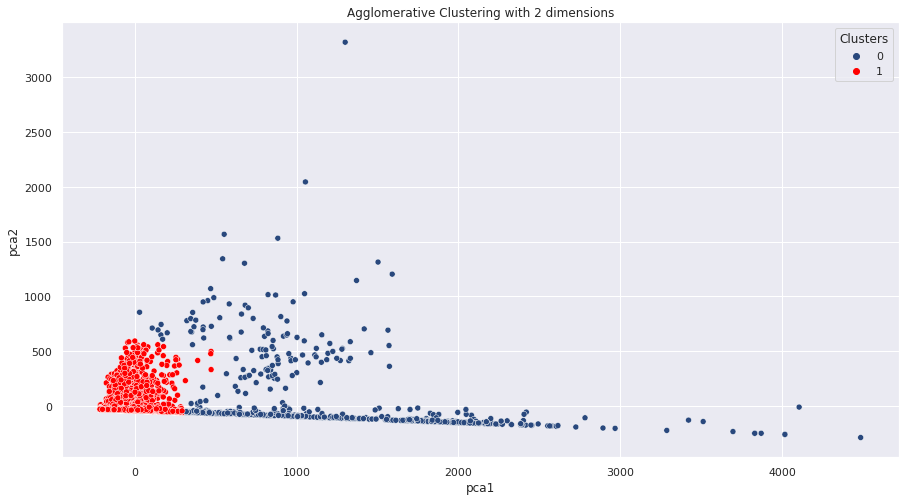

In [260]:
reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette=pal)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

Documentacion de ITAcademy

---



In [261]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df1)
data_scaled = pd.DataFrame(data_scaled, columns=df1.columns)
data_scaled.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour,Clusters
0,0.001979,0.518499,0.854929,0.005937,0.001979,0.001979,0.0,0.007916,0.011874,0.001979
1,0.013186,0.000000,0.988963,0.000000,0.000000,0.000000,0.0,0.026372,0.145048,0.006593
2,0.004718,0.268937,0.962510,0.004718,0.004718,0.000000,0.0,0.018873,0.028309,0.004718
3,0.018000,0.000000,0.998987,0.000000,0.000000,0.000000,0.0,0.036000,0.018000,0.009000
4,0.009800,0.000000,0.999640,0.000000,0.000000,0.000000,0.0,0.019601,0.014701,0.004900


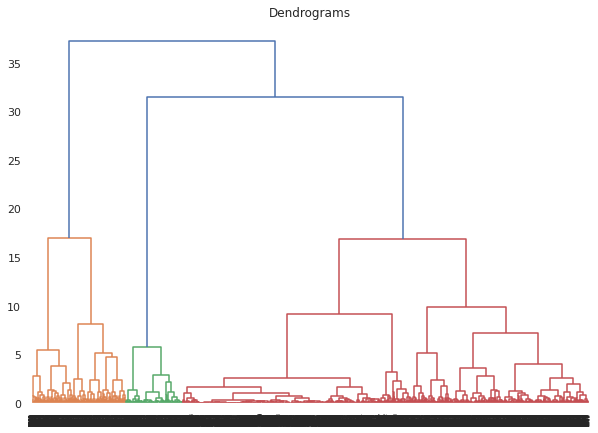

In [262]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

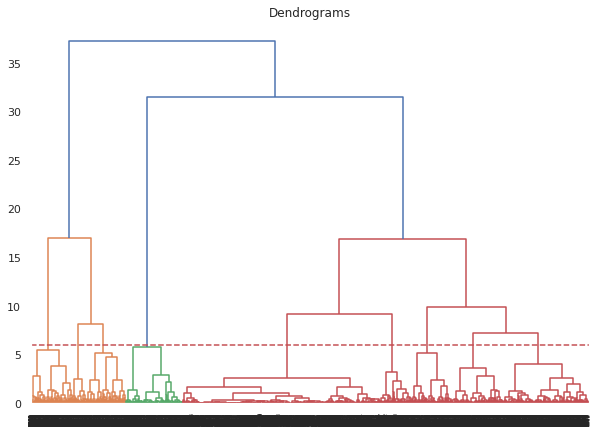

In [263]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [264]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 0, 0])

In [265]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

KeyError: ignored

<Figure size 720x504 with 0 Axes>

# - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [266]:
# choosing the best number of clusters using the silhouette score
from sklearn import metrics
Knumber=[]
CHnumber=[]

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8543433000638827)
For n_clusters = 3, silhouette score is 0.8070207322405227)
For n_clusters = 4, silhouette score is 0.6338222582207528)
For n_clusters = 5, silhouette score is 0.6361490138910734)
For n_clusters = 6, silhouette score is 0.6366143132484406)
For n_clusters = 7, silhouette score is 0.6834366892422472)
For n_clusters = 8, silhouette score is 0.6534860419565914)
For n_clusters = 9, silhouette score is 0.645352187233203)


Text(0, 0.5, 'Calinski-Harabasz Indice')

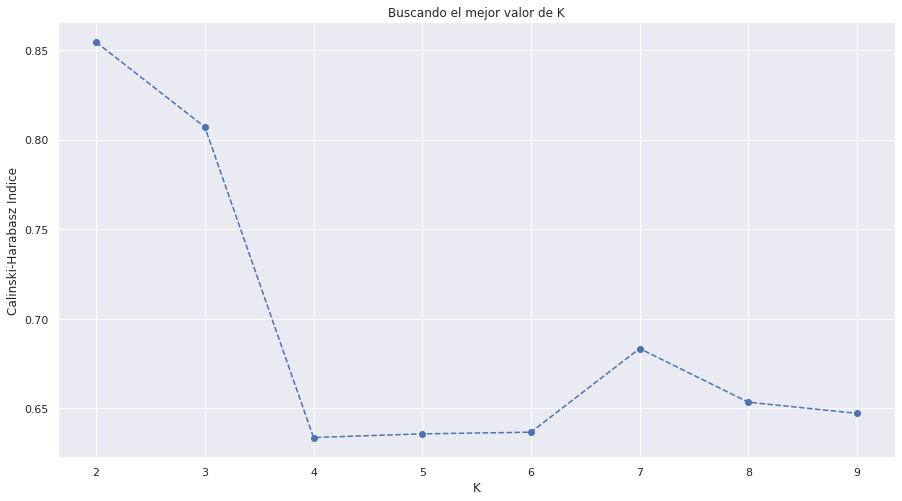

In [ ]:
plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')